<img src='images/psyduck.jpg'>

## **Pokémon Crystal Data Analysis**

**Uploading Datasets and Importing Libraries**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('pokemon_data.csv')
type_advantages = pd.read_csv('typing_chart.csv')

**Filter Pokemon Dataset to Pokemon Only in Pokemon Crystal** <br>
- Filtering out Mega Evolutions
- Gen 1 & 2
- Non-Legendaries

In [24]:
# Notice Meganium was missing from dataset due to it having the name "Mega" in it when filtering out mega evolutions
pokemon_crystal = df[(df['Generation'] <= 2) & (df['Legendary'] == False) & (~df['Name'].str.contains('Mega '))]
pokemon_crystal

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
265,246,Larvitar,Rock,Ground,50,64,50,45,50,41,2,False
266,247,Pupitar,Rock,Ground,70,84,70,65,70,51,2,False
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False


**Correct Errors within Both Datasets**

In [25]:
# Noticed errors in the type advantages dataset. Fixed it to the correct advantage and disadvantage for the matched up Types
type_advantages.at[13, 'Steel'] = 0.5
type_advantages.at[15, 'Steel'] = 0.5
type_advantages.at[12, 'Fire'] = 2.0

# Celebi is catagorized as non-legendary, "False", when it should be labeled as "True"
df.at[271, 'Legendary'] = True

### **Analysis Phase**

#### **Part 1: Finding the Best Pokemon Type**

In [26]:
# Look at Pokemon Type Advantages Chart
type_advantages

,Types,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,0.5,NaN
1,Fire,NaN,0.5,0.5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,0.5,NaN,2.0,NaN
2,Water,NaN,2.0,0.5,NaN,0.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,0.5,NaN,NaN,NaN
3,Electric,NaN,NaN,2.0,0.5,0.5,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,Grass,NaN,0.5,2.0,NaN,0.5,NaN,NaN,0.5,2.0,0.5,NaN,0.5,2.0,NaN,0.5,NaN,0.5,NaN
5,Ice,NaN,0.5,0.5,NaN,2.0,0.5,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN
6,Fighting,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN,0.5,0.5,0.5,2.0,0.0,NaN,2.0,2.0,0.5
7,Poison,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.5,0.5,NaN,NaN,NaN,0.5,0.5,NaN,NaN,0.0,2.0
8,Ground,NaN,2.0,NaN,2.0,0.5,NaN,NaN,2.0,NaN,0.0,NaN,0.5,2.0,NaN,NaN,NaN,2.0,NaN
9,Flying,NaN,NaN,NaN,0.5,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,0.5,NaN,NaN,NaN,0.5,NaN


In [27]:
# Count each Type total advantages over another Poke Type
for index, row in type_advantages.iterrows():
    count_2x = (row == 2.0).sum()
    print(f"In row {index}, the value 2.0 occurs {count_2x} times.")


In row 0, the value 2.0 occurs 0 times.
In row 1, the value 2.0 occurs 4 times.
In row 2, the value 2.0 occurs 3 times.
In row 3, the value 2.0 occurs 2 times.
In row 4, the value 2.0 occurs 3 times.
In row 5, the value 2.0 occurs 4 times.
In row 6, the value 2.0 occurs 5 times.
In row 7, the value 2.0 occurs 2 times.
In row 8, the value 2.0 occurs 5 times.
In row 9, the value 2.0 occurs 3 times.
In row 10, the value 2.0 occurs 2 times.
In row 11, the value 2.0 occurs 3 times.
In row 12, the value 2.0 occurs 4 times.
In row 13, the value 2.0 occurs 2 times.
In row 14, the value 2.0 occurs 1 times.
In row 15, the value 2.0 occurs 2 times.
In row 16, the value 2.0 occurs 3 times.
In row 17, the value 2.0 occurs 3 times.


In [28]:
# Count each Type total disadvantages over defending Poke Type
for column_name in type_advantages.columns:
    col_weak = (type_advantages[column_name] == 0.5).sum()
    print(f'In column {column_name}, the value 0.5 occurs {col_weak} times.') 

In column Types, the value 0.5 occurs 0 times.
In column Normal, the value 0.5 occurs 0 times.
In column Fire, the value 0.5 occurs 6 times.
In column Water, the value 0.5 occurs 4 times.
In column Electric, the value 0.5 occurs 3 times.
In column Grass, the value 0.5 occurs 4 times.
In column Ice, the value 0.5 occurs 1 times.
In column Fighting, the value 0.5 occurs 3 times.
In column Poison, the value 0.5 occurs 5 times.
In column Ground, the value 0.5 occurs 2 times.
In column Flying, the value 0.5 occurs 3 times.
In column Psychic, the value 0.5 occurs 2 times.
In column Bug, the value 0.5 occurs 3 times.
In column Rock, the value 0.5 occurs 4 times.
In column Ghost, the value 0.5 occurs 2 times.
In column Dragon, the value 0.5 occurs 4 times.
In column Dark, the value 0.5 occurs 2 times.
In column Steel, the value 0.5 occurs 12 times.
In column Fairy, the value 0.5 occurs 3 times.


In [29]:
#Create a New Dataset Scoring Tallies of Offensive(Very Effective Against) and Defensive(Not Very Effective Against this Type)
data = {
    'Types': ['Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'],
    'Offensive': [0, 4, 3, 2, 3, 4, 5, 2, 5, 3, 2, 3, 4, 2, 1, 2, 3, 3],
    'Defensive': [0, 6, 4, 3, 4, 1, 3, 5, 2, 3, 2, 3, 4, 2, 4, 2, 12, 3]
}

#Calculate Total Score of Both Offensive & Defensive
type_advantage_score = pd.DataFrame(data)
type_advantage_score['Score Total'] = type_advantage_score[['Offensive', 'Defensive']].sum(axis=1)
type_advantage_score.sort_values(['Score Total'], ascending=False)

,Types,Offensive,Defensive,Score Total
16,Steel,3,12,15
1,Fire,4,6,10
12,Rock,4,4,8
6,Fighting,5,3,8
2,Water,3,4,7
4,Grass,3,4,7
7,Poison,2,5,7
8,Ground,5,2,7
9,Flying,3,3,6
11,Bug,3,3,6


<Axes: xlabel='Score Total', ylabel='Types'>

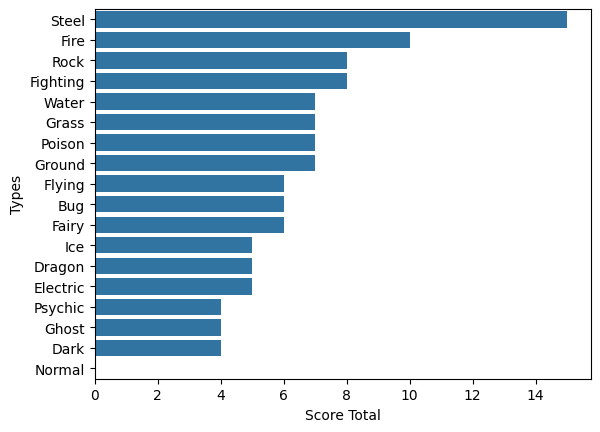

In [30]:
# Type Advantages Score in a Data Visualization
sns.barplot(y='Types', x='Score Total', data=type_advantage_score, order=type_advantage_score.sort_values('Score Total', ascending=False)['Types'])

#### **Part 2: Base Stat Total Analysis**

In [31]:
pokemon_crystal['Base Total'] = pokemon_crystal[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

In [46]:
#Filtering out Few Names that Do Not Meet Criteria
pokemon_crystal.sort_values(['Base Total'], ascending=False)[~pokemon_crystal["Name"].isin([
    'Tyranitar',
    'Mew',
    'Charizard', 
    'Blastoise', 
    'Venusaur',
    'Feraligatr',
    'Meganium', 
    'Celebi'])].head(35)

C:\Users\Grayson\AppData\Local\Temp\ipykernel_14804\2409444254.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pokemon_crystal.sort_values(['Base Total'], ascending=False)[~pokemon_crystal["Name"].isin([


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Base Total
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,600
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,540
140,130,Gyarados,Water,Flying,95,125,79,60,100,81,1,False,540
249,230,Kingdra,Water,Dragon,75,95,95,95,95,85,2,False,540
155,143,Snorlax,Normal,NaN,160,110,65,65,110,30,1,False,540
183,169,Crobat,Poison,Flying,85,90,80,70,80,130,2,False,535
142,131,Lapras,Water,Ice,130,85,80,85,95,60,1,False,535
171,157,Typhlosion,Fire,NaN,78,84,78,109,85,100,2,False,534
145,134,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False,525


### **My Top 6**

#### **1. Dragonite**

In [58]:
pokemon_crystal.sort_values(['Attack'], ascending=False).head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Base Total
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,600
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,600
120,112,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False,485
235,217,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,500
74,68,Machamp,Fighting,NaN,90,130,80,65,85,55,1,False,505


<Axes: xlabel='Stat', ylabel='Value'>

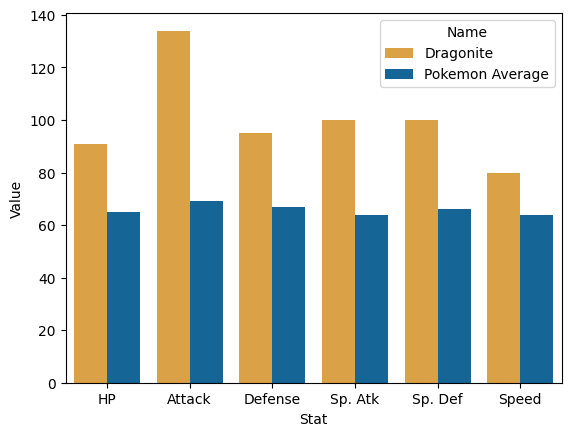

In [33]:
#Let's create a graph comparing Dragonite's Stats to the average Crystal's pokedex
crystal_avg_stats = pokemon_crystal[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean().astype(int)
dragonite_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Dragonite'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Concatenate Data into one DF
combined_data = pd.concat([dragonite_stats, crystal_avg_stats.to_frame().T])
combined_data['Name'].fillna('Pokemon Average', inplace=True)
melted_df2 = pd.melt(combined_data, id_vars=['Name'], var_name='Stat', value_name='Value')

# Adding Colors
dragonite_colors = ['#f2a62e', '#006aab']

sns.barplot(x='Stat', y='Value', data=melted_df2, hue='Name', palette=dragonite_colors)

<img src="images/dragonite.png">

**Summary:** <br>
Dragonite dominates the entire pokedex by being #1 in the highest base stats! In all 6 categories towering over the Pokemon average. While also having the 2nd highest attack in the entire game. 1st highest excluding Tyranitrar since he is a endgame pokemon, not fitting the criteria. Dragonite wins for number 1 being the highest base stat, highest attack, and 3 100+ stats.

#### **2. Typhlosion**

In [34]:
#Next we start with the pokemon starter: We have the selection between Feraligatr, Typhlosion, and Meganium.
pokemon_crystal[pokemon_crystal['Name'].isin(['Feraligatr', 'Typhlosion', 'Meganium'])].sort_values('Base Total', ascending=False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Base Total
171,157,Typhlosion,Fire,NaN,78,84,78,109,85,100,2,False,534
174,160,Feraligatr,Water,NaN,85,105,100,79,83,78,2,False,530
168,154,Meganium,Grass,NaN,80,82,100,83,100,80,2,False,525


**For the sake of a better looking chart and using clear observations with the data, we will exclude Meganium for having the lowest Base Stats out of the 3 starters.**

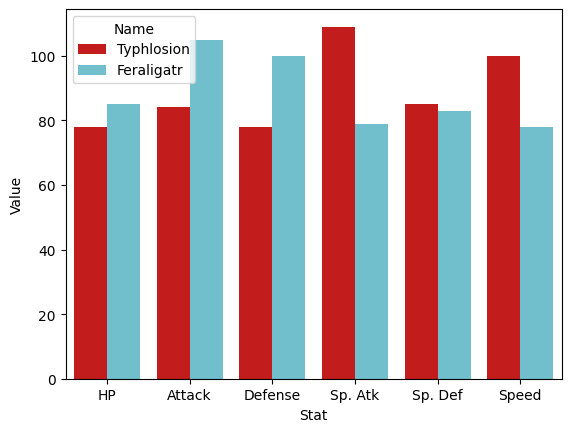

In [35]:
#Now let's create a graph comparing Typhlosions & Feraligatr's Stats
typhlosion_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Typhlosion'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
feraligatr_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Feraligatr'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

combined_data3 = pd.concat([typhlosion_stats, feraligatr_stats])
combined_data3['Name'].fillna('Pokemon Average', inplace=True)
melted_df3 = pd.melt(combined_data3, id_vars=['Name'], var_name='Stat', value_name='Value')

typhlo_colors = ['#DE0000', '#62c9dc']
sns.barplot(x='Stat', y='Value', data=melted_df3, hue='Name', palette=typhlo_colors)
plt.legend(title='Name', loc='upper left')

<img src="images/typhlosion.png">

**Summary:** <br>
As we can see, Typhlosion's stats excel in Sp. Atk, Sp. Def, and Speed. We have Typhlosion balancing out the team with a high 109 Special Attack as Snorlax, Steelix, Gyarados as our hitters of physical attack. Typhlosion and Feraligatr are nearly similar in stats. However, from our earlier analysis of type advantages, we concluded that Fire type was the 2nd best type advantage. Therefore Typhlosion has the type advantage and Stat advantage over Feraligatr, especially Meganium. Typhlosion wins for best Gen 2 Starter!

#### **3. Snorlax**

<Axes: xlabel='Stat', ylabel='Value'>

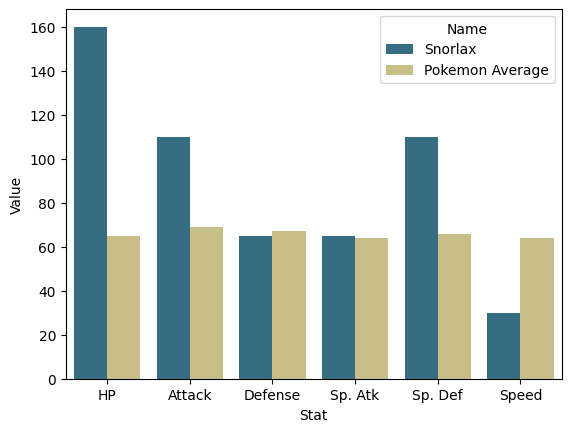

In [36]:
#Now let's create a graph comparing Snorlax's Stats to the average Crystal's pokedex
snorlax_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Snorlax'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
combined_data2 = pd.concat([snorlax_stats, crystal_avg_stats.to_frame().T])
combined_data2['Name'].fillna('Pokemon Average', inplace=True)
melted_df2 = pd.melt(combined_data2, id_vars=['Name'], var_name='Stat', value_name='Value')

snorlax_colors = ['#29738F', '#d3c77d']
sns.barplot(x='Stat', y='Value', data=melted_df2, hue='Name', palette=snorlax_colors)   

<img src="images/snorlax.png">

**Summary:** <br>
While this Pokemon may be always sleeping throughout the day, Snorlax makes it to the Top 6 by being the 6th highest Base Stat Total according to our filtered data! Snorlax towers over the pokemon average in 3 categories that are over 100 in HP, Attack, Sp. Def. He may not be the best in Type Advantages, but his high base stats and overwhelming cuteness make up for it.

#### **4. Steelix**

Now I know what you're thinking. Wait a minute Steelix only has 1 100+ stat and it's in Defense? Why does he qualifiy? 

In [47]:
pokemon_crystal[pokemon_crystal['Name'] == 'Steelix']

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Base Total
223,208,Steelix,Steel,Ground,75,85,200,55,65,30,2,False,510


In [ ]:
#Using "df.style" to Better Data Visualize Steelix's Type Advantages against other Types.
def color_background(val):
    if val == 0.5:
        return 'background-color: red'
    if val == 2.0:
        return 'background-color: green'
    if val == 0:
        return 'background-color: black'
    else:
        return ''
    
f = {'Steel':'{:.1f}'}
styled_steel_column = type_advantages[['Types', 'Steel']].style.applymap(color_background)
styled_steel_column.format(f)

<img src="images/df.png" width="150" height='525'>

<img src="images/steelix.png">

**Summary:** <br>
Steelix is a Steel type, hence the name. From our earlier Analysis we concluded Steel was the best Pokémon Type due to its great Defense against 12 other types that were less effective against Steel. Making it very unlikely to be hit by most Poké Types, with the added bonus of it being immune to Poison. Defense is the best Offense, making Steelix qualify for the top 6 with a whopping 200 Defense.

#### **5. Espeon**

In [50]:
# Top 5 Highest Sp. Atk
pokemon_crystal.sort_values(['Sp. Atk'], ascending=False).head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Base Total
70,65,Alakazam,Psychic,NaN,55,50,45,135,95,120,1,False,500
101,94,Gengar,Ghost,Poison,60,65,60,130,75,110,1,False,500
211,196,Espeon,Psychic,NaN,65,65,60,130,95,110,2,False,525
111,103,Exeggutor,Grass,Psychic,95,95,85,125,65,55,1,False,520
69,64,Kadabra,Psychic,NaN,40,35,30,120,70,105,1,False,400


<Axes: xlabel='Stat', ylabel='Value'>

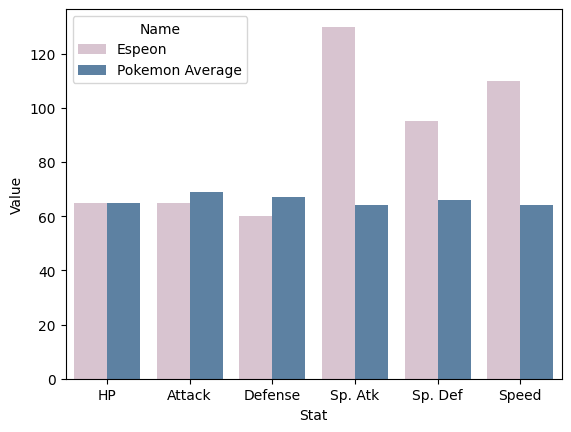

In [38]:
#Now let's create a graph comparing Snorlax's Stats to the average Crystal's pokedex
espeon_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Espeon'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
combined_data4 = pd.concat([espeon_stats, crystal_avg_stats.to_frame().T])
combined_data4['Name'].fillna('Pokemon Average', inplace=True)
melted_df4 = pd.melt(combined_data4, id_vars=['Name'], var_name='Stat', value_name='Value')

espeon_colors = ['#dbc1d1', '#5181ad']
sns.barplot(x='Stat', y='Value', data=melted_df4, hue='Name', palette=espeon_colors)   

<img src="images/espeon.png">

**Summary:** <br>
Espeon wins the Top 6 for having the 2nd highest Sp. Atk in Crystal. Espeon has 3 incredible 100+ in the Sp. Atk, Sp. Def, and Speed category. While their type advantages may not be the highest against others unlike Steelix and Typhlosion, they are great against Fighting and Poison

#### **6. Gyarados**

<Axes: xlabel='Stat', ylabel='Value'>

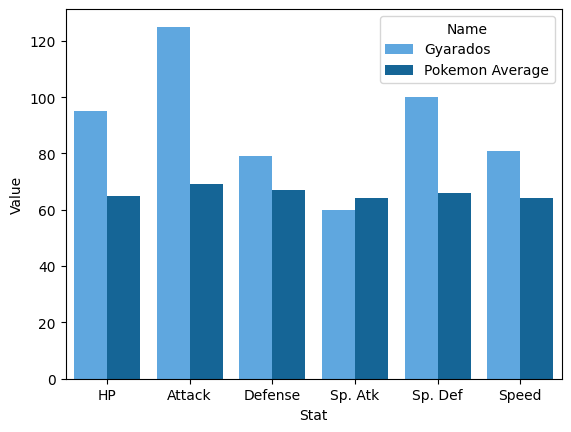

In [45]:
#Now let's create a graph comparing Gyarados's Stats to the average Crystal's pokedex
gyarados_stats = pokemon_crystal[pokemon_crystal['Name'] == 'Gyarados'][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
combined_data5 = pd.concat([gyarados_stats, crystal_avg_stats.to_frame().T])
combined_data5['Name'].fillna('Pokemon Average', inplace=True)
melted_df5 = pd.melt(combined_data5, id_vars=['Name'], var_name='Stat', value_name='Value')

gyarados_colors = ['#4AAAF4', '#006aab']
sns.barplot(x='Stat', y='Value', data=melted_df5, hue='Name', palette=gyarados_colors)   

<img src="images/gyarados.png">

**Summary:** <br>
Gyarados qualifies for the top 6 pick for several reason. From our earlier Analysis we can see, Gyarados has 4th highest Base Stats in the game based on our filtering. Gyarados is above the the Pokemon Average Stat in 6 of the 7 categories. Gyarados's Type advantages are good being a Water type, the 5th best Pokemon Type. Water helps give good diversity in the team pairing well next to Typhlosion's Fire Type